In [10]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [11]:
import sys
sys.maxsize

9223372036854775807

In [12]:
data = load_diabetes()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y[0]

151.0

In [13]:
reg = LinearRegression().fit(X_train,y_train)
predicted = reg.predict(X_test)

In [14]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,predicted)
print('r2 socre is' ,score)
print('mean_sqrd_error is==',mean_squared_error(y_test,predicted))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,predicted)))

r2 socre is 0.452606602161738
mean_sqrd_error is== 2900.1732878832318
root_mean_squared error of is== 53.8532569849144


In [15]:
y_test

array([219.,  70., 202., 230., 111.,  84., 242., 272.,  94.,  96.,  94.,
       252.,  99., 297., 135.,  67., 295., 264., 170., 275., 310.,  64.,
       128., 232., 129., 118., 263.,  77.,  48., 107., 140., 113.,  90.,
       164., 180., 233.,  42.,  84., 172.,  63.,  48., 108., 156., 168.,
        90.,  52., 200.,  87.,  90., 258., 136., 158.,  69.,  72., 171.,
        95.,  72., 151., 168.,  60., 122.,  52., 187., 102., 214., 248.,
       181., 110., 140., 202., 101., 222., 281.,  61.,  89.,  91., 186.,
       220., 237., 233.,  68., 190.,  96.,  72., 153.,  98.,  37.,  63.,
       184.])

In [16]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [17]:
X_train_num = np.dot(X_train,1000).astype(int)
X_test_num = np.dot(X_test,1000).astype(int)
y_train_num = y_train
y_test_num = y_test

In [18]:
print(X_train_num)

[[ 70  50  12 ...  34  27  -1]
 [ -9  50 -18 ...  71   0  19]
 [  5 -44  49 ...  -2  17 -13]
 ...
 [ 30 -44 -20 ... -39 -10  -1]
 [-12 -44 -23 ...  -2 -38 -38]
 [-92 -44  28 ... -39  -5  -1]]


In [19]:
X_train_den = np.full(X_train.shape, 1000) 
X_test_den = np.full(X_test.shape, 1000) 
y_train_den = np.ones(len(y_train))
y_test_den = np.ones(len(y_test))

In [20]:
print(X_train_den)

[[1000 1000 1000 ... 1000 1000 1000]
 [1000 1000 1000 ... 1000 1000 1000]
 [1000 1000 1000 ... 1000 1000 1000]
 ...
 [1000 1000 1000 ... 1000 1000 1000]
 [1000 1000 1000 ... 1000 1000 1000]
 [1000 1000 1000 ... 1000 1000 1000]]


In [21]:
#shortening numners 
def shorter(c,d):
    c = int(c)
    d = int(d)
    if(c<0):
        n = c*(-1)
        if(len(str(n))==len(str(d)) and len(str(n))>3):      
            a = f"{n:.0f}"
            a = str(a[:-3])
            a = int(a)*(-1)
            b = f"{d:.0f}"
            b = str(b[:-3])
            b = int(b)
        elif(len(str(n))>=3 and len(str(d))>=3):
            a = f"{n:.0f}"
            a = str(a)
            b = f"{d:.0f}"
            b = str(b)
            if(len(str(a))<len(str(b))):
                s = len(str(a))-2
            else:
                s = len(str(b))-2
            a = int(a[:-s])
            b = int(b[:-s])
            a = a*-1 
        else:
            a = int(n*-1)
            b = d
    elif(len(str(c))==len(str(d)) and len(str(c))>3):      
            a = f"{c:.0f}"
            a = str(a[:-2])
            a = int(a)
            b = f"{d:.0f}"
            b = str(b[:-2])
            b = int(b)
#     elif(len(str(c))==1 and len(str(d))>3):
#         a = int(0)
#         b = int(1)
    elif(len(str(c))>3 and len(str(d))>3):
            a = f"{c:.0f}"
            a = str(a)
            b = f"{d:.0f}"
            b = str(b)
            if(len(str(a))<len(str(b))):
                s = len(str(a))-3
            else:
                s = len(str(b))-3
            a = int(a[:-s])
            b = int(b[:-s])
    else:
        a = c
        b = d
    return a,b

In [22]:
#condensed function multiply and add matrix with numerator and denominator one row at a time
# Python Program to find the L.C.M. of two input number
from math import gcd
def compute_lcm(x, y):
   # choose the greater number 
    if (x > y):
        greater = x
    else:
        greater = y
    while(True):
        if(x==0):
            lcm = y
            break
        elif(y==0):
            lcm = x
            break
        elif((greater % x == 0) and (greater % y == 0)):
            lcm = greater
            break
        greater += 1
    return lcm
 
#Subtracting 2 numbers of the form a/b -c/d
def subtraction(a,b,c,d):
    den = compute_lcm(b,d)
    if b ==0:
        num = c ; den = d
    elif d==0:
        num= a ; den = b
    else:    
        num = ((den/b)*a) - ((den/d)*c)
    return num,den

#adding array of elements of the form x/y
def add_array(a_num,a_den):
    #will work for an int array of any length
    lcm = np.amax(a_den);sum1 =0
#     for i in a_den:
#         lcm = int(lcm*i/gcd(lcm, i))
#     print("lcm is ",lcm)
    for i in range(len(a_num)):
        sum1 = sum1 + (a_num[i]*(a_den[i]/lcm))
#         print(a_num[i],a_den[i],lcm)      
#     print("sum is ", sum1)
    return sum1,lcm

#adding two numbers of the form a/b + c/d
def addition(a,b,c,d):
    den = compute_lcm(b,d)
    if b ==0:
        num = c ; den = d
    elif d==0:
        num= a ; den = b
    else:    
        num = ((den/b)*a) + ((den/d)*c)
    return int(num),int(den)

#multiplying two arrays of fraction and adding them  for row by column multiplication
def multiply(a_num,a_den,b_num, b_den):
#     print(type(a_num))
    z_num = np.zeros(len(a_num)).astype(int)
    z_den = np.zeros(len(a_den)).astype(int)
#     print("printing anum,aden,bnum,bden",a_num,a_den,b_num,b_den)                                   
    for i in range(len(a_num)):
        z_num[i]=(a_num[i]*b_num[i])     
        z_den[i]=(a_den[i]*b_den[i])
    
    x = z_num.tolist()
    y = z_den.tolist()
#     print("Printing z_num and z_den", x , y )
    num,den = add_array(x,y)
#     print("multiplication results is",num,den) 
    return num,den
    

In [23]:
z = np.array([1,2,3,4,5,6,7,8,9,10])



In [24]:
#claculate y_hat =wx+b | x is in the form a single array and w is in the form of array too
# need toc hange w into wnum and wden
def y_hat(w_num,w_den,x_num,x_den,b):
    y_hat_num = np.zeros(x_num.shape[0]).astype(int)
    y_hat_den = np.zeros(x_den.shape[0]).astype(int)
    #multiplying w and x
    for i in range(x_num.shape[0]):
#         print("iteration number ",i)
        x_n = x_num[i] 
        x_d = x_den[i] 
#         print(x_n,x_d,w_num,w_den)
        temp_n, temp_d = multiply(x_n,x_d,w_num,w_den)
#         print("printing temporary values",temp_n,temp_d)
        y_hat_num[i],y_hat_den[i] = addition( temp_n, temp_d,b[0],b[1])
        y_hat_num[i],y_hat_den[i] = shorter(y_hat_num[i],y_hat_den[i])   #trying this
#     print("y_hat values for this iterationsa are",y_hat_num,y_hat_den)
    return y_hat_num,y_hat_den

In [25]:
#calculating mean square values
def mse(y_hat_num,y_hat_den,y_num,y_den,n):
    num=0;den =0
    for i in range(len(y_hat_num)):
        num1,den1=subtraction(y_num[i],y_den[i],y_hat_num[i],y_hat_den[i])
        num1 = num1*num1
        den1 = den1*den1
        num,den = addition(num,den,num1,den1)
    den = den * n
#     print(num,den)
    return num,den

In [26]:
#calculating subtraction of Y_hat Y
def y_hat_substraction(y_hat_num,y_hat_den,y_num,y_den):
    y_diff =np.zeros((y_hat_num.shape[0],2))
    for i in range(len(y_hat_num)):
        y_diff[i][0],y_diff[i][1] = subtraction(y_hat_num[i],y_hat_den[i], y_num[i], y_den[i])
    return y_diff



In [27]:
#getting delta w with respect 
#need change - can call the subtraction of y_hat from y
def delta_w(y_hat_diff,x_num, x_den, n):
    del_w_num = np.zeros(x_num.shape[1])
    del_w_den = np.zeros(x_num.shape[1])
    
    x_num = x_num.T
    x_den = x_den.T
    y_num = y_hat_diff[:,0]
    y_den = y_hat_diff[:,1]
    
#     print("getting delta w num and den ")
    for i in range(len(del_w_num)):
#         print("printing X",len(x_num[i]))
#         print("printing X",len(x_den[i]))
#         print("printing y diff",len( y_num))
#         print("printing y diff", len(y_den))
        del_w_num[i],del_w_den[i] = multiply(x_num[i],x_den[i],y_num,y_den)
        del_w_num[i] = del_w_num[i]*2
        del_w_den[i] = del_w_den[i]*n
#     print("delta w num and den are",del_w_num,del_w_den)
    return del_w_num,del_w_den

    
    

In [28]:
#getting delta b 
def delta_b(y_hat_diff):

#     print(type(y_hat_diff))
    yh_num = np.array(y_hat_diff[:,0]).astype(int)
    yh_den = np.array(y_hat_diff[:,1]).astype(int)
#     print(type(yh_num[0]))
#     print(type(yh_den[0]))    
#     print("printing yh_num",yh_num)
#     print("printing yh_den",yh_den)
    num,den = add_array(yh_num, yh_den)
    num = num*2
    den = den*len(yh_num)
#     print("printing delta_b", num,den)
    return num,den

In [29]:
# get new weights and biases
def get_new_params(lr, dw_num,dw_den,db_num,db_den,w_num,w_den,b_num,b_den):
    
    for i in range(len(dw_num)):
        dw_num[i]= dw_num[i]*lr[0]
        dw_den[i]= dw_den[i]*lr[1]
   
    btemp_num = lr[0] * db_num
    btemp_den = lr[1] * db_den 

    for i in range(len(dw_num)):
        dw_num[i],dw_den[i] = subtraction(w_num[i],w_den[i],dw_num[i],dw_den[i]) 
    
    db_num,db_den = subtraction(b_num,b_den,btemp_num,btemp_den)
#     print("printing new weight parameters", dw_num,dw_den)
#     print("printing new bias parameters",db_num,db_den)
    return  dw_num,dw_den,db_num,db_den

In [30]:
#normalize weights and bias
def normalize_weights_bias(wnum,wden, bnum,bden):
    wn_num = np.zeros(10) 
    wn_den = np.zeros(10)
    for i in range (len(wf_num)):
        wn_num[i] = int((wnum[i]/wden[i]) * 100)
        wn_den[i] = 100
    bnum = int(bnum/bden * 100)
    bden = 100
    
#     print("Normalizing weights and biases",wn_num,wn_den, bnum, bden)
    return wn_num, wn_den,bnum, bden

In [31]:
wnum = np.ones(10)
wden = np.ones(10)
b =[1,1]
bnum =1
bden =1
lr = [1,1000]

In [32]:
#getting y_hat = wx+b and , this matches with my main code
wnum = np.ones(10)
wden = np.ones(10)
b =[1,1]
bnum =1
bden =1
lr = [5,10]
loss_num =[]
loss_den=[]
for i in range(1000):
    yh_num,yh_den = y_hat(wnum,wden,X_train_num, X_train_den,b)
#     print("bias is ",(b))
#     print("printing y_hat results",yh_num, yh_den)

    #getting MSE, MSE matches with my main code
    mse_num,mse_den= mse(yh_num, yh_den, y_train_num,y_train_den,len(yh_num))
    loss_num.append(mse_num)
    loss_den.append(mse_den)
#     print("loss is ",mse_num, mse_den)

    #getting y_hat differenc
    y_diff = y_hat_substraction(yh_num,yh_den,y_train_num,y_train_den)
    y_diff
#     print("yhat subtraction ", y_diff)
    # get delta_W
    delw_num,delw_den = delta_w(y_diff,X_train_num,X_train_den, len(yh_num))

    # get delta_b
    delb_num, delb_den = delta_b(y_diff)

#     print("printing deltas ",delw_num,delw_den,delb_num, delb_den )
    #get new parameters
    wf_num,wf_den,bf_num,bf_den = get_new_params(lr, delw_num,delw_den,delb_num,delb_den,wnum,wden,bnum,bden)

    #normalize weights and bias parameters
    wnum,wden, bnum, bden = normalize_weights_bias(wf_num,wf_den,bf_num,bf_den)
    b[0] = bnum
    b[1] = bden
#     print("printing marameters", wnum,wden, bnum, bden)
#     print(i)
print(wnum,wden, bnum, bden)

[  3955. -20105.  51093.  32687.  -6955. -11645. -21492.  14565.  37639.
  11384.] [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.] 15132 100


In [33]:
loss1000 = []
for i in range(len(loss_num)):
    loss1000.append(loss_num[i]/loss_den[i])

In [35]:
w = np.array(wnum/wden).astype(int)
b = int(bnum/bden)
print("parameters are ", w,b)
pred =[]
for i in range(X_test.shape[0]):
    sum1 =0
    for j in range (len(wnum)):
        sum1 = sum1 + X_test[i][j] * w[j]
    pred.append(sum1+b)
y_pred = np.array(pred)

parameters are  [  39 -201  510  326  -69 -116 -214  145  376  113] 151


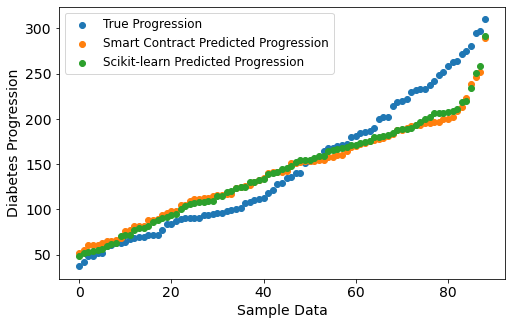

In [40]:
import matplotlib.pyplot as plt
x = np.arange(len(y_test))
plt.figure(figsize=(8,5))
yt= np.sort(y_test) # true value
ps = np.sort(y_pred) # smart contract prediction
pt = np.sort(predicted) # scikit-learn prediction
plt.scatter(x, yt,label="True Progression")
plt.scatter(x, ps,label="Smart Contract Predicted Progression")
plt.scatter(x, pt,label="Scikit-learn Predicted Progression")

plt.xlabel('Sample Data', size=14)
plt.ylabel('Diabetes Progression', size=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.savefig('diabetes-pred.pdf',bbox_inches='tight')
plt.show()

In [ ]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,pred)
print('r2 socre is' ,score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred)))